# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [16]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:Comment on the histogram and data: the charges is a highly right skewed distribution, which implies that 
while most charges are lower and clustered towards the left, which are below 10000, there are some higher 
charges stretching the tail to the right. 
The mean charge is $13,270.42. Given the skewness of the data, this value might be influenced by the extreme 
high values (outliers) in the dataset. The mean might not represent a typical charge value. The median may
provides a better central measure because it is less influenced by extreme values.
The standard deviation is $12,105.48, which indicates a high variability in the hospital charges. 
It means that there's a wide range of charges.
It might be more appropriate to also consider other measures of dispersion like the interquartile range (IQR) 
which provides a range for the middle 50% of the data and is less influenced by outliers.
Given the shape of the histogram and the provided statistics, it's clear that there's a wide variability in the charges. 
To sum up, while the mean and standard deviation provide valuable information about the distribution of charges, 
their interpretation should be done with caution, especially given the skewed nature of the data.

(array([208., 174., 154., 140., 139., 119.,  55.,  32.,  42.,  36.,  23.,
         27.,  16.,  16.,   3.,  15.,  22.,  22.,  22.,  19.,  16.,  14.,
         16.,   2.,   1.,   1.,   0.,   1.,   1.,   2.]),
 array([ 1121.8739  ,  3210.159037,  5298.444174,  7386.729311,
         9475.014448, 11563.299585, 13651.584722, 15739.869859,
        17828.154996, 19916.440133, 22004.72527 , 24093.010407,
        26181.295544, 28269.580681, 30357.865818, 32446.150955,
        34534.436092, 36622.721229, 38711.006366, 40799.291503,
        42887.57664 , 44975.861777, 47064.146914, 49152.432051,
        51240.717188, 53329.002325, 55417.287462, 57505.572599,
        59593.857736, 61682.142873, 63770.42801 ]),
 <BarContainer object of 30 artists>)

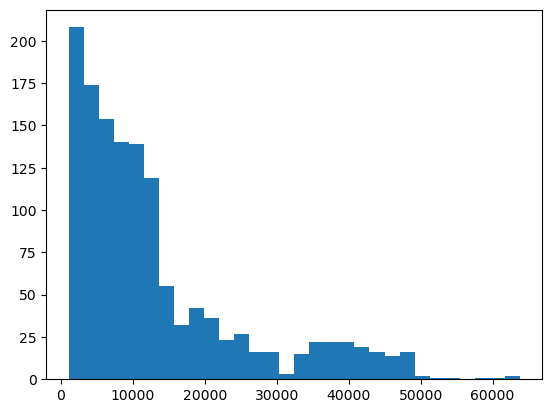

In [8]:
#Plot the histogram of charges 
plt.hist(medical['charges'], bins=30)

In [30]:
#calculate the mean and standard deviation
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'])
print(f"the mean of charges: {sample_mean:.2f}, and the standard deviation of charges: {sample_std:.2f}")

the mean of charges: 13270.42, and the standard deviation of charges: 12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: First, these data represents a random sample of charges. A random sample ensures that the sample's statistics are representative of the population parameters. Second, the 1338 sample sizes is sufficiently large while typically benchmark is n > 30 for CLT. 
As the Population Standard Deviation of charges is unknown, the t-distribution is more appropriate than the z-distribution. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:As the main concern is whether the mean has fallen below $12000, a one-sided test is suitable instead of two-sided test. So, a one-sided t-test would be the most appropriated frequentist test for this scenario. 
Null Hypothesis: The population mean (μ) is greater than or equal to $12,000.
Alternative Hypothesis: The population mean (μ) is less than $12,000.

According to the result, a one-sided 95% confidence interval for the mean have a lower bound of $12,750, which means we are 95% confident that the true population mean is greater than or equal to $12,750. Since $12,000 is not in the 95% confidence interval, it's less likely that the true population mean is below $12,000. So the administrator should not be concerned that the mean has fallen below $12000. 

In [35]:
# Calculate the critical value and the relevant 95% confidence interval for the mean
# the critical t-value for a 95% confidence interval:
alpha = 0.05
n = 1338 #sample size
df = n-1
t_value = t.ppf(1-alpha, df)
t_value

1.6459941145571317

In [36]:
# calculate the sample standard deviation s: 
s = np.std(medical['charges'], ddof=1) 
s

12110.011236693994

In [37]:
#calculate the margin of error (MOE)
MOE = t_value * (s/np.sqrt(n))
MOE

544.9350813250251

In [38]:
#calculate the confidence interval of the mean
confidence_interval = sample_mean - MOE
print(confidence_interval)

12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A: Null Hypothesis: There is no difference in charges between people with insurance and those without.
Mathematically, this can be represented as:
μ(insured) = μ(uninsured) where μ(insured)is the mean charge for people with insurance and μ(uninsured)is the mean charge for people without insurance.

Alternative Hypothesis: There is a difference in charges between people with insurance and those without.
Mathematically, this can be represented as: μ(insured) ≠ μ(uninsured). 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [42]:
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [46]:
insured_sample_size = insured.count()
insured_sample_mean = insured.mean()
insured_sample_std = insured.std()
print(insured_sample_size, insured_sample_mean, insured_sample_std)

783 16423.928276537677 14045.928418802127


In [47]:
uninsured_sample_size = uninsured.count()
uninsured_sample_mean = uninsured.mean()
uninsured_sample_std = uninsured.std()
print(uninsured_sample_size, uninsured_sample_mean, uninsured_sample_std)

555 8821.421892306305 6446.510126811736


In [50]:
#the pooled standard deviation of the two groups is:

sp = np.sqrt((((insured_sample_size - 1) * (insured_sample_std ** 2)) + ((uninsured_sample_size - 1) * (uninsured_sample_std ** 2)))/(insured_sample_size + uninsured_sample_size - 2))
sp

11520.034268775256

In [54]:
# t-test statistic:

t_statistic = (insured_sample_mean - uninsured_sample_mean) / (sp * np.sqrt(1/insured_sample_size + 1/uninsured_sample_size))
t_statistic

11.893299030876715

In [60]:
from scipy.stats import t
# Calculate p-value
df= insured_sample_size + uninsured_sample_size - 2
p_value = 2 * (1 - t.cdf(t_statistic, df))

print(p_value)

0.0


In [53]:
#Verify the result via scipy.stats t-test

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(insured, uninsured)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 11.893299030876712
P-value: 4.461230231620717e-31


Conclusion: the p-value to be virtually zero, indicating a very statistically significant difference between two groups.
People with insurance really are charged a different amount to those without.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test